# Problem Description
Anomaly detection aims at finding unexpected or rare events in data streams, commonly referred to as anomalous events. Detecting anomalies could be useful directly or as a first insight to find new knowledge in the data. Anomaly detection is fundamental in many applications, most notably in real-time applications, where spotting anomalies is vital such as in health, critical infrastructures, security applications, to name a few.

The objective of Unsupervised Anomaly Detection is to detect previously unseen rare objects or events without any prior knowledge about these. The only information available is that the percentage of anomalies in the dataset is small, usually less than 1%. Since anomalies are rare and unknown to the user at training time, anomaly detection in most cases boils down to the problem of modelling the normal data distribution and defining a measurement in this space in order to classify samples as anomalous or normal.

In this session, use the Fraud Detection dataset of the session (creditcardfraud_normalised.csv) to train an unsupervised algorithm for anomaly detection:
* Test K-Means algorithm
* Search other popular methods for this task and compare to the previous one.

## Google Colab link: https://colab.research.google.com/drive/1BhArUVKtiReGEE22Sywktt17_0BAZh8r?usp=sharing

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

## 1. Load and Explore the dataset

In [ ]:
# Load the df
df = pd.read_csv('session_14-creditcardfraud_normalised.csv')

# Display the first 5 rows of the df
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [ ]:
# Show the basic information of the data into
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
# Check for missing values
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [ ]:
# Basic statistics
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265356,0.785385,0.462780,0.508722,...,0.561480,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,...,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942658,0.760943,0.821985,0.214311,0.761060,0.255295,0.261980,0.783148,0.440626,0.497644,...,0.557798,0.484730,0.663030,0.334454,0.560105,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,...,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.980645,0.775739,0.855214,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518114,...,0.564484,0.534688,0.667626,0.441460,0.597593,0.464808,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Inital Impressions:
The dataset consists of transactions represented by 30 features.

- **Features V1 to V28**: These appear to be the result of a Principal Component Analysis transformation, which is a common for anonymizing sensitive data and reducing

- **Amount**: This feature likely represents the transaction amount $$. It has been normalized, which aligns with the rest of the dataset being prepared for machine learning tasks.

- **Class**: This is the label for each transaction, where '0' indicates a normal transaction and '1' indicates a fraudulent transaction. A

The data is already preprocessed to a large extent, with PCA applied to most features and normalization done. For unsupervised anomaly detection, we will primarily rely on the V1 to V28 features and possibly the Amount, observing how transactions cluster and identifying outliers as potential anomalies.

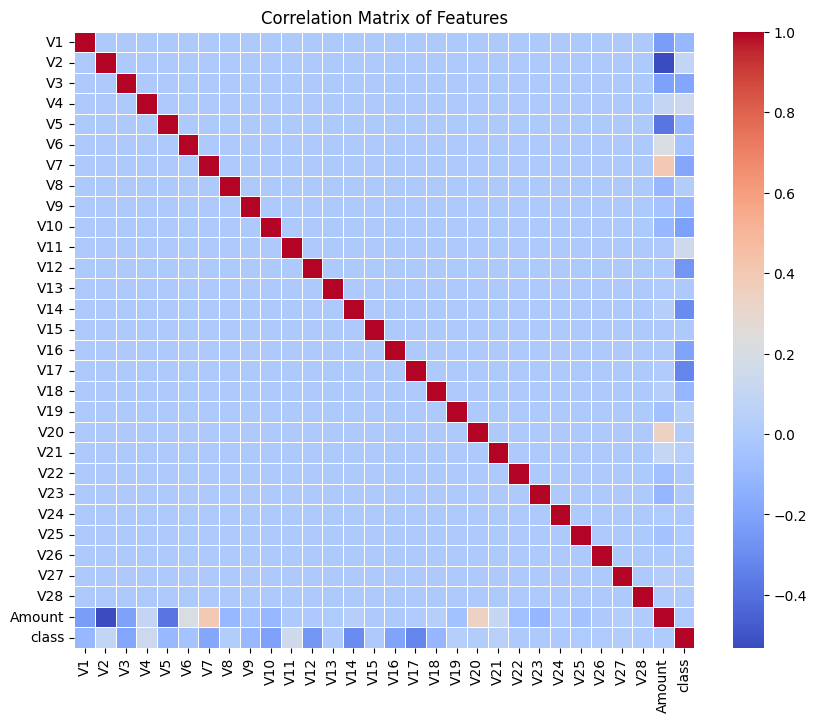

(V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 class     0
 dtype: int64,
                   V1             V2             V3             V4   
 count  284807.000000  284807.000000  284807.000000  284807.000000  \
 mean        0.958294       0.767258       0.837414       0.251930   
 std         0.033276       0.017424       0.026275       0.062764   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         0.942658       0.760943       0.821985       0.214311   
 
                   V5             V6             V7             V8   
 count  284807.000000  284807.000000  284807.000000  284807.000000  \
 mean        0.765716       0.263

In [ ]:
# Further exploration:

# Check for missing values
missing_values = df.isnull().sum()

# Summary statistics
summary_statistics = df.describe()

# Correlation matrix to see potential relationships between features
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, lw=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

missing_values, summary_statistics.head()

### Data exploration insights

- **Missing Values**: There are no missing values in any of the features, which simplifies the preprocessing step as no imputation is required.

- **Summary Statistics**:
  - The features `V1` to `V28`, resulting from PCA, have varying means and standard deviations, indicating differing scales of variance. This aligns with the expectation that PCA components capture different amounts of variance in the data.
  - The `Amount` feature, representing transaction amounts, has been normalized, with a mean significantly lower than 1, reflecting the fact that transaction amounts vary widely and have been scaled down.
  - The `class` feature indicates a very low mean (~0.0017), which confirms the dataset's imbalanced nature, with fraudulent transactions being much less common than legitimate ones.

- **Correlation Matrix**:
  - The heatmap of the correlation matrix does not show strong correlations among the PCA features, which is expected since PCA aims to remove multicollinearity by constructing orthogonal (independent) components.
  - The lack of strong correlations suggests that these features might independently contribute to any model's ability to distinguish between normal and anomalous transactions.

## 2. Preprocessing: Split the data

In [ ]:
# Since it's unsupervised learning, we won't use 'class' for splitting but it's useful for later evaluation
X = df.drop('class', axis=1)  # Features
y = df['class']  # Labels for evaluation purposes

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits to confirm the operation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

## 4. K-Means Model
- Determineing optimal K clusters
- Train the K-Means model

Training KMeans with k=2...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=2: 10255.962265777027
Training KMeans with k=3...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=3: 9560.191902970933
Silhouette Score for k=3: 0.0906620112830195
Training KMeans with k=4...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=4: 9000.719664543785
Silhouette Score for k=4: 0.08742083470012227
Training KMeans with k=5...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=5: 8646.9719451076
Silhouette Score for k=5: 0.08558545010700133
Training KMeans with k=6...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=6: 8333.414417129927
Silhouette Score for k=6: 0.08352290138048288
Training KMeans with k=7...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=7: 8028.8672490550225
Silhouette Score for k=7: 0.09391740617399394
Training KMeans with k=8...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=8: 7777.681441585415
Silhouette Score for k=8: 0.08982939092558574
Training KMeans with k=9...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=9: 7549.856113616137
Silhouette Score for k=9: 0.0917068259402204
Training KMeans with k=10...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia for k=10: 7393.529540175262
Silhouette Score for k=10: 0.08110275686879716


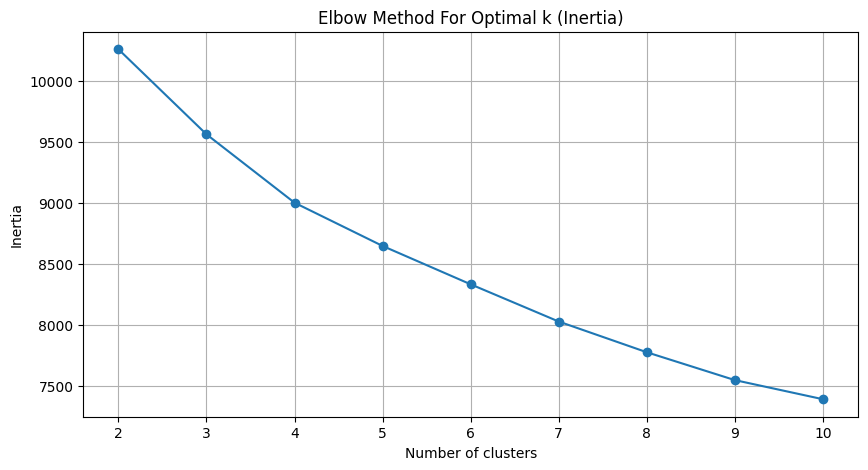

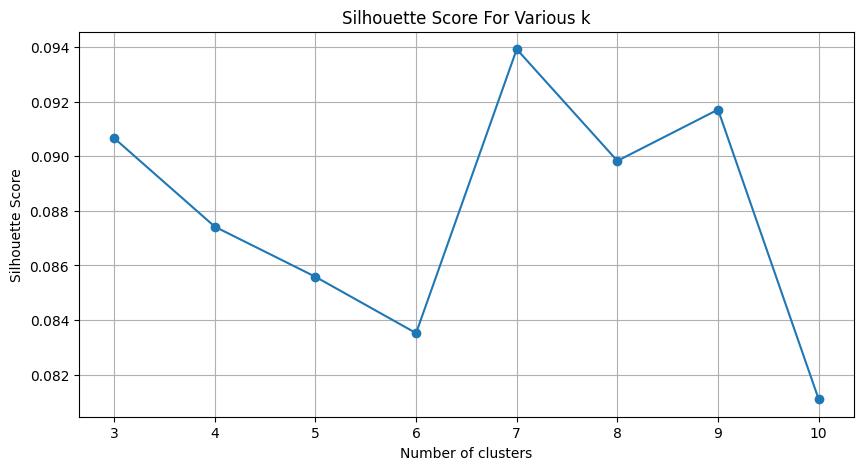

In [ ]:
# Determining the optimal number of clusters using the Elbow Method
# Evaluate a range of cluster numbers to find the optimal one

# Define the range of clusters to try

k_range = range(2, 11)

inertias = []  # To store the inertias for each k
silhouette_scores = []  # To store silhouette scores for each k

for k in k_range:
    print(f"Training KMeans with k={k}...")
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertia = kmeans.inertia_
    inertias.append(inertia)
    print(f"Inertia for k={k}: {inertia}")
    # Calculating silhouette scores only for k > 2, as silhouette score cannot be calculated for k=1
    if k > 2:
        silhouette_score_value = silhouette_score(X_train, kmeans.labels_)
        silhouette_scores.append(silhouette_score_value)
        print(f"Silhouette Score for k={k}: {silhouette_score_value}")

# Plotting the Elbow Graph for Inertia
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k (Inertia)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Plotting Silhouette Scores
if silhouette_scores:
    plt.figure(figsize=(10, 5))
    # Adjusted k_range to match the length of silhouette_scores
    plt.plot(k_range[1:], silhouette_scores, marker='o')  # Corrected to k_range[1:] to align with silhouette_scores
    plt.title('Silhouette Score For Various k')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_range[1:])  # Adjusted to start from the second element
    plt.grid(True)
    plt.show()



Given the results I obtained, where 7 clusters have the highest silhouette score and 10 clusters have the lowest score, this suggests that:

- 7 Clusters: This configuration likely provides a good balance of cohesion and separation, making it a suitable choice for the dataset. The data points in each of the 7 clusters are, on average, closer to other points in the same cluster and farther from points in other clusters. This could indicate a more meaningful grouping that captures the inherent structure of the data well.

- 10 Clusters: The lower silhouette score for 10 clusters suggests that this configuration may lead to over-segmentation, where the additional clusters do not contribute to a meaningful separation of the data. It could be that some clusters are too close to each other, or some clusters contain points that are not as well related, leading to a decrease in the average silhouette score.

## 5. Anomaly Detection

In [ ]:
# train the k-means model with the optimal number of clusters (7) on the training data
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [ ]:
# detecting anomalies

# Calculate the distance of each point in the train set from its nearest cluster center
distances = cdist(X_train, kmeans.cluster_centers_, 'euclidean')
min_distances = np.min(distances, axis=1)
threshold = np.mean(min_distances) + 3 * np.std(min_distances)

# Identifying points that are farther than this threshold as anomalies
anomalies_train = min_distances > threshold

# Repeat the process for the test set
distances_test = cdist(X_test, kmeans.cluster_centers_, 'euclidean')
min_distances_test = np.min(distances_test, axis=1)
anomalies_test = min_distances_test > threshold

In [ ]:
# Evaluating the anomaly detection on the training set
print("Evaluation on Training Set:")
print(classification_report(y_train, anomalies_train))

# Evaluating the anomaly detection on the test set
print("Evaluation on Test Set:")
print(classification_report(y_test, anomalies_test))

Evaluation on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227451
           1       0.14      0.78      0.23       394

    accuracy                           0.99    227845
   macro avg       0.57      0.89      0.61    227845
weighted avg       1.00      0.99      0.99    227845

Evaluation on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.13      0.81      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



### Analysis of Metrics:

### Training Set Evaluation:
- **Precision for Class 0 (Normal Transactions)**: Almost perfect at 1.00, indicating that nearly all transactions predicted as normal are indeed normal.
- **Recall for Class 0**: Also very high at 0.99, meaning the model successfully identifies 99% of all normal transactions.
- **Precision for Class 1 (Anomalous/Fraudulent Transactions)**: Quite low at 0.14, suggesting that only 14% of transactions predicted as anomalies are actually fraudulent. This is indicative of a high false positive rate.
- **Recall for Class 1**: Impressively high at 0.78, indicating that the model is able to identify 78% of all fraudulent transactions as anomalies.
- **Overall Accuracy**: Stands at 0.99, which seems excellent but is somewhat misleading due to the imbalanced nature of the dataset (where the vast majority of transactions are normal).

### Test Set Evaluation:
- **Precision for Class 0**: Remains high at 1.00, consistent with the training set, indicating good performance on normal transactions.
- **Recall for Class 0**: Similar to the training set at 0.99, showing the model's effectiveness in identifying normal transactions.
- **Precision for Class 1**: Again low at 0.13, indicating a significant number of false positives among the anomalies detected.
- **Recall for Class 1**: Very high at 0.81, even slightly better than the training set, showing the model's strength in catching fraudulent transactions.
- **Overall Accuracy**: As with the training set, is 0.99 due to the dataset's imbalance.

### Analysis:
- The high recall for fraudulent transactions (Class 1) in both the training and test sets is promising, as it indicates the model's capability to detect a high proportion of actual fraudulent activities.
- However, the low precision for Class 1 reflects a high number of false positives; that is, many normal transactions are incorrectly flagged as anomalies. This is a common challenge in anomaly detection, especially in highly imbalanced datasets like this one.
- The overall accuracy metric, while seemingly high, is not the best indicator of performance for imbalanced datasets. The high accuracy is largely due to the model's ability to identify the overwhelming majority of transactions correctly as normal.
- The macro averages for precision, recall, and f1-score provide a more balanced view of the model's performance across both classes, taking the imbalance into account. The scores indicate that there's a significant trade-off between recall and precision, especially for the anomalous class.


## 6. Applying Other Anomaly Detection Method

Another popular and powerful method that I will use is the **Isolation Forest** algorithm. This algorithm i well-suited for detecting anomalies because it works by isolating outliers instead of modeling the normal points. It's based on the principle that anomalies are data points that are few and different, making them easier to isolate from the rest of the observations.



In [ ]:
# model training

# Initialize the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model on the training data using the same split as the KMeans model
iso_forest.fit(X_train)


IsolationForest(random_state=42)

In [ ]:
# perform anomaly detection on the training and test sets

# Predict anomalies on the training set
y_pred_train = iso_forest.predict(X_train)
# Convert predictions to match the original label format (1 for anomalies, 0 for normal)
y_pred_train = (y_pred_train == -1).astype(int)

# Predict anomalies on the test set
y_pred_test = iso_forest.predict(X_test)
# Convert predictions to match the original label format
y_pred_test = (y_pred_test == -1).astype(int)



In [ ]:
# Evaluate the model

# Evaluation on the training set
print("Evaluation on Training Set:")
print(classification_report(y_train, y_pred_train))

# Evaluation on the test set
print("Evaluation on Test Set:")
print(classification_report(y_test, y_pred_test))


Evaluation on Training Set:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    227451
           1       0.04      0.81      0.07       394

    accuracy                           0.96    227845
   macro avg       0.52      0.89      0.53    227845
weighted avg       1.00      0.96      0.98    227845

Evaluation on Test Set:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.84      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.96      0.98     56962



## Analysis of Metrics:

### Training Set Evaluation:
- **Precision for Class 0 (Normal Transactions)**: Remains high at 1.00, indicating excellent identification of normal transactions as normal.
- **Recall for Class 0**: Lowered to 0.96, suggesting that 4% of normal transactions are incorrectly identified as anomalies, leading to a slightly higher false positive rate compared to the K-Means approach.
- **Precision for Class 1 (Anomalous/Fraudulent Transactions)**: Very low at 0.04, meaning only 4% of transactions identified as anomalies are actually fraudulent. This indicates a higher false positive rate among detected anomalies.
- **Recall for Class 1**: Significantly high at 0.81, showing the model's strong capability to detect fraudulent transactions among all actual fraudulent cases.
- **Overall Accuracy**: Stands at 0.96, which is slightly lower than the K-Means approach due to the increased false positive rate.

### Test Set Evaluation:
- **Precision for Class 0**: Consistent with the training set at 1.00.
- **Recall for Class 0**: Also consistent with the training set at 0.96.
- **Precision for Class 1**: Matches the training set at 0.04, indicating a consistent pattern of a high number of false positives in anomaly detection.
- **Recall for Class 1**: Extremely high at 0.84, slightly higher than the training set, indicating very effective identification of true anomalies.
- **Overall Accuracy**: Similar to the training set at 0.96.

## Comparison: K-means vs Isolation Forest
Both K-Means and Isolation Forest have their strengths and weaknesses in anomaly detection:
- **K-Means** provided a better balance between identifying normal and anomalous transactions, with a higher precision for anomalies but a slightly lower recall.
- **Isolation Forest** excelled in identifying a high percentage of actual fraudulent transactions (high recall) but at the cost of a large number of false positives (low precision).

In practical applications, the choice between these methods might come down to the specific requirements of the task:
- If detecting as many frauds as possible is the priority, and the cost of investigating false positives is relatively low, Isolation Forest might be preferred due to its higher recall.
- If minimizing false positives is crucial due to high investigation costs, one might lean towards K-Means or further tune the Isolation Forest parameters, like the contamination factor, to try and improve precision.